<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/19_2_tf_object_detection_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텐서플로에서 객체감지 API를 제공하고 있음

https://github.com/tensorflow/models/tree/master/research/object_detection

설치 참고
https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/eager_few_shot_od_training_tf2_colab.ipynb



In [ ]:
# 텐서플로우 깃허브에서 모델 파일들 복사하여 설치
!pip install -U --pre tensorflow=="2.2.0"   # 기본 설치된 버전에서는 아래쪽에서 설치할때 일부 패키지 오류 발생함

import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models  # 텐서플로우 모델 코드있는 깃허브, depth 1은 최신 파일로 가져오기

  Using cached https://files.pythonhosted.org/packages/4c/1a/0d79814736cfecc825ab8094b39648cc9c46af7af1bae839928acb73b4dd/tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a4/f5/926ae53d6a226ec0fda5208e0e581cffed895ccc89e36ba76a8e60895b78/tensorflow_estimator-2.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1d/74/0a6fcb206dcc72a6da9a62dd81784bfdbff5fedb099982861dc2219014fb/tensorboard-2.2.2-py3-none-any.whl
ERROR: tf-models-official 2.4.0 has requirement tensorflow>=2.4.0, but you'll have tensorflow 2.2.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.

In [ ]:
!ls

models	sample_data


In [ ]:
# Object Detection API 설치
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Using cached https://files.pythonhosted.org/packages/70/dc/e8c5e7983866fa4ef3fd619faa35f660b95b01a2ab62b3884f038ccab542/tensorflow-2.4.1-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/44/f5/7feea02a3fb54d5db827ac4b822a7ba8933826b36de21880518250b8733a/tensorboard-2.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/7e/622d9849abf3afb81e482ffc170758742e392ee129ce1540611199a59237/tensorflow_estimator-2.4.0-py2.py3-none-any.whl
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1647299 sha256=5eed805f95f63685fcfbe6bcd36d7ead22b76e8b8cbdb5aef771993ff7b77fa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-148obt2f/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-

In [ ]:
import tensorflow as tf
base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/'
filename = 'image1.jpg'
image_path = tf.keras.utils.get_file(fname=filename, origin=base_url + filename, untar=False)

In [ ]:
image_path

'/root/.keras/datasets/image1.jpg'

In [ ]:
import cv2
img0 = cv2.imread(image_path)

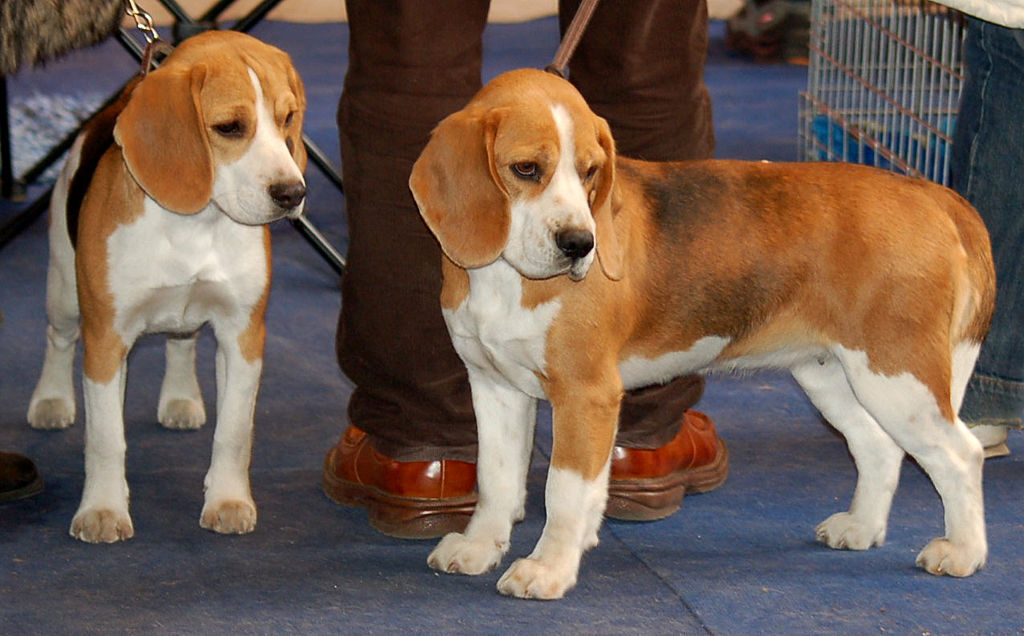

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img0)

In [ ]:
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

모델을 불러옵니다. (Saved Model Format)

Tensorflow Model Zoo
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

* 가져오고 싶은 모델에서 오른쪽 마우스 클릭해서 링크 복사해보면

download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz

위의 형식으로 나옵니다. 


In [ ]:
# Download and extract model
url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz'
model_name = 'centernet_hg104_1024x1024_coco17_tpu-32'

model_dir = tf.keras.utils.get_file(fname = model_name, origin = url , untar=True)

In [ ]:
model_dir

'/root/.keras/datasets/centernet_hg104_1024x1024_coco17_tpu-32'

In [ ]:
!ls {model_dir}

checkpoint  pipeline.config  saved_model


불러온 모델은 coco dataset으로 학습되어 있음, 
라벨 파일을 불러와야 함

https://github.com/tensorflow/models/tree/master/research/object_detection/data

coco dataset

https://cocodataset.org/#home

In [ ]:
# Download labels file
base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
filename = 'mscoco_label_map.pbtxt'
label_dir = tf.keras.utils.get_file(fname=filename,origin=base_url + filename, untar=False)

In [ ]:
label_dir

'/root/.keras/datasets/mscoco_label_map.pbtxt'

In [ ]:
!ls '/root/.keras/datasets'

centernet_hg104_1024x1024_coco17_tpu-32		image1.jpg
centernet_hg104_1024x1024_coco17_tpu-32.tar.gz	mscoco_label_map.pbtxt


In [ ]:
import time
from object_detection.utils import label_map_util

category_index = label_map_util.create_category_index_from_labelmap(label_dir, use_display_name=True)

In [ ]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [ ]:
# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(img0)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = tf.expand_dims(input_tensor, axis=0)

In [ ]:
input_tensor.shape

TensorShape([1, 636, 1024, 3])

In [ ]:
# Load saved model and build the detection function
detect_fn = tf.saved_model.load(model_dir + '/saved_model')

In [ ]:
detections = detect_fn(input_tensor)


In [ ]:
detections

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[1.04250059e-01, 3.95554185e-01, 9.45799589e-01, 9.75899816e-01],
         [4.73979712e-02, 2.71871388e-02, 8.63245130e-01, 2.97761023e-01],
         [0.00000000e+00, 2.93467939e-01, 8.39180589e-01, 7.02598989e-01],
         [0.00000000e+00, 2.68885434e-01, 8.50852787e-01, 6.88176215e-01],
         [0.00000000e+00, 5.29595256e-01, 2.55776167e-01, 7.01260805e-01],
         [1.59735046e-03, 8.63457978e-01, 7.34125555e-01, 9.99635875e-01],
         [0.00000000e+00, 5.32542348e-01, 2.55923897e-01, 7.45067716e-01],
         [1.76006288e-03, 9.18878496e-01, 7.34331310e-01, 9.99508440e-01],
         [3.22458858e-04, 7.07261324e-01, 9.71093029e-02, 7.95582294e-01],
         [2.91527424e-04, 7.06042409e-01, 9.55000222e-02, 7.73644447e-01],
         [7.56845518e-04, 7.76838303e-01, 7.35182881e-01, 1.00000000e+00],
         [3.22458858e-04, 7.07261324e-01, 9.71093029e-02, 7.95582294e-01],
         [0.00000000e+00, 2

In [ ]:
result = {key:value.numpy() for key,value in detections.items()}

In [ ]:
result

{'detection_boxes': array([[[1.04250059e-01, 3.95554185e-01, 9.45799589e-01, 9.75899816e-01],
         [4.73979712e-02, 2.71871388e-02, 8.63245130e-01, 2.97761023e-01],
         [0.00000000e+00, 2.93467939e-01, 8.39180589e-01, 7.02598989e-01],
         [0.00000000e+00, 2.68885434e-01, 8.50852787e-01, 6.88176215e-01],
         [0.00000000e+00, 5.29595256e-01, 2.55776167e-01, 7.01260805e-01],
         [1.59735046e-03, 8.63457978e-01, 7.34125555e-01, 9.99635875e-01],
         [0.00000000e+00, 5.32542348e-01, 2.55923897e-01, 7.45067716e-01],
         [1.76006288e-03, 9.18878496e-01, 7.34331310e-01, 9.99508440e-01],
         [3.22458858e-04, 7.07261324e-01, 9.71093029e-02, 7.95582294e-01],
         [2.91527424e-04, 7.06042409e-01, 9.55000222e-02, 7.73644447e-01],
         [7.56845518e-04, 7.76838303e-01, 7.35182881e-01, 1.00000000e+00],
         [3.22458858e-04, 7.07261324e-01, 9.71093029e-02, 7.95582294e-01],
         [0.00000000e+00, 2.83581644e-01, 9.33248162e-01, 7.12258458e-01],
      

In [ ]:
import numpy as np
result = {key:np.squeeze(value.numpy()) for key,value in detections.items()}

In [ ]:
result

{'detection_boxes': array([[1.04250059e-01, 3.95554185e-01, 9.45799589e-01, 9.75899816e-01],
        [4.73979712e-02, 2.71871388e-02, 8.63245130e-01, 2.97761023e-01],
        [0.00000000e+00, 2.93467939e-01, 8.39180589e-01, 7.02598989e-01],
        [0.00000000e+00, 2.68885434e-01, 8.50852787e-01, 6.88176215e-01],
        [0.00000000e+00, 5.29595256e-01, 2.55776167e-01, 7.01260805e-01],
        [1.59735046e-03, 8.63457978e-01, 7.34125555e-01, 9.99635875e-01],
        [0.00000000e+00, 5.32542348e-01, 2.55923897e-01, 7.45067716e-01],
        [1.76006288e-03, 9.18878496e-01, 7.34331310e-01, 9.99508440e-01],
        [3.22458858e-04, 7.07261324e-01, 9.71093029e-02, 7.95582294e-01],
        [2.91527424e-04, 7.06042409e-01, 9.55000222e-02, 7.73644447e-01],
        [7.56845518e-04, 7.76838303e-01, 7.35182881e-01, 1.00000000e+00],
        [3.22458858e-04, 7.07261324e-01, 9.71093029e-02, 7.95582294e-01],
        [0.00000000e+00, 2.83581644e-01, 9.33248162e-01, 7.12258458e-01],
        [2.91527424

In [ ]:
print("Found {} objects.".format(result['num_detections']))

Found 100.0 objects.


In [ ]:
def show_boxes(img, result, threshold):
  height, width, channel = img.shape 
  n = int(result['num_detections'])
  boxes = result['detection_boxes']
  for i in range(n):
    # box
    if result['detection_scores'][i]<threshold: continue
    startX = int(boxes[i][1]* width)
    startY = int(boxes[i][0]* height)
    endX = int(boxes[i][3]* width)
    endY = int(boxes[i][2]* height)
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)

    # text
    title = category_index[result['detection_classes'][i]]['name']
    prob = round(result['detection_scores'][i] * 100,1)
    img = cv2.putText(img, title + ' ' + str(prob) + '%', (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)


In [ ]:
img0 = cv2.imread(image_path)

In [ ]:
show_boxes(img0, result, 0.7)

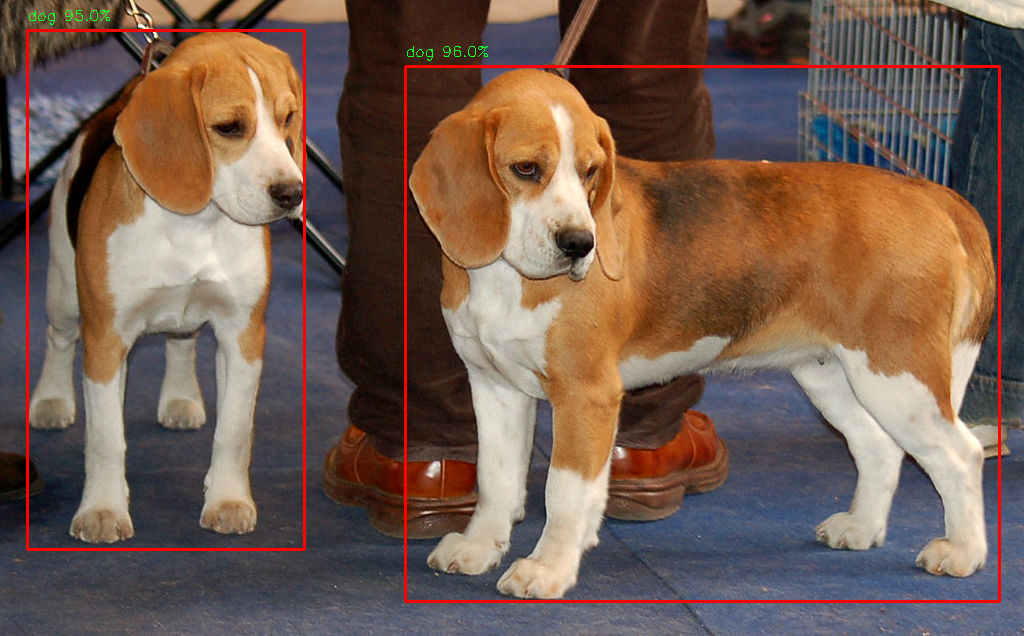

In [ ]:
cv2_imshow(img0)